#Importing Dependencies


In [88]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Mounting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading Datasets

##Fake data

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Thesis and Research/dataFiles/LabeledFake-1K.csv')
fake.head()

articleID                    domain                        date  \
0          1         channeldhaka.news   2019-03-14T13:34:14+00:00   
1          2                 earki.com            সেম্বর ১৭, ২০১৮    
2          3                 earki.com  ২০:৩৯, জানুয়ারি ১৪, ২০১৯    
3          4         channeldhaka.news   2018-06-30T15:56:47+00:00   
4          5  motikontho.wordpress.com   2013-03-05T21:55:45+00:00   

        category    source   relation  \
0  International  Reporter  Unrelated   
1  Miscellaneous  Reporter  Unrelated   
2  Miscellaneous  Reporter  Unrelated   
3         Sports  Reporter  Unrelated   
4  Miscellaneous  Reporter  Unrelated   

                                            headline  \
0                           মুরগির হামলায় শেয়াল নিহত   
1            বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম   
2  বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...   
3                      অবসর নেয়ার ঘোষণা দিলেন মেসি !   
4  মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...   

                                             content  label  F-type  
0  বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...      0  Satire  
1  BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...      0  Satire  
2  অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...      0  Satire  
3  রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...      0  Satire  
4  নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...      0  Satire

##Real data

In [ ]:
real = pd.read_csv('/content/drive/MyDrive/Thesis and Research/dataFiles/LabeledAuthentic-7K.csv' ,encoding='UTF-8', nrows=1500)
real.head()

articleID           domain                 date  category  \
0          1  bd-pratidin.com  2018-09-20 08:16:43    Sports   
1          2     jugantor.com  2018-09-20 20:20:20    Sports   
2          3     bd24live.com  2018-09-20 16:39:40  National   
3          4     bd24live.com  2018-09-19 18:27:56  National   
4          5     somoynews.tv  2018-09-20 10:15:28   Finance   

                               source relation  \
0  আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান  Related   
1                            Reporter  Related   
2                            Reporter  Related   
3            জননিরাপত্তা বিভাগের সচিব  Related   
4    পেট্রোল পাম্প মালিক সমিতি সভাপতি  Related   

                                            headline  \
0          হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ   
1                           টস হেরে বোলিংয়ে বাংলাদেশ   
2                     রাজধানীতে বিশেষ অভিযানে আটক ৪৩   
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4     'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'   

                                             content  label  
0  ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...    1.0  
1  এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...    1.0  
2  রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...    1.0  
3  সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...    1.0  
4  ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...    1.0

##WordClouds

##Exploring Real news

In [ ]:
real['category'].value_counts() 

National         608
Sports           226
International    224
Editorial         88
Entertainment     78
Politics          75
Miscellaneous     63
Finance           37
Technology        35
Education         25
Lifestyle         21
Crime             20
Name: category, dtype: int64

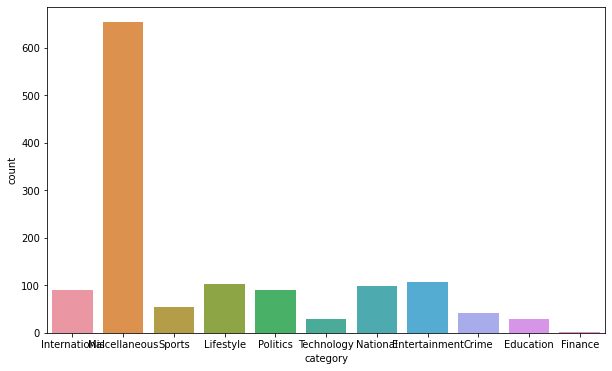

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'category', data = fake)

In [ ]:
text = ' '.join(fake['content'].tolist())

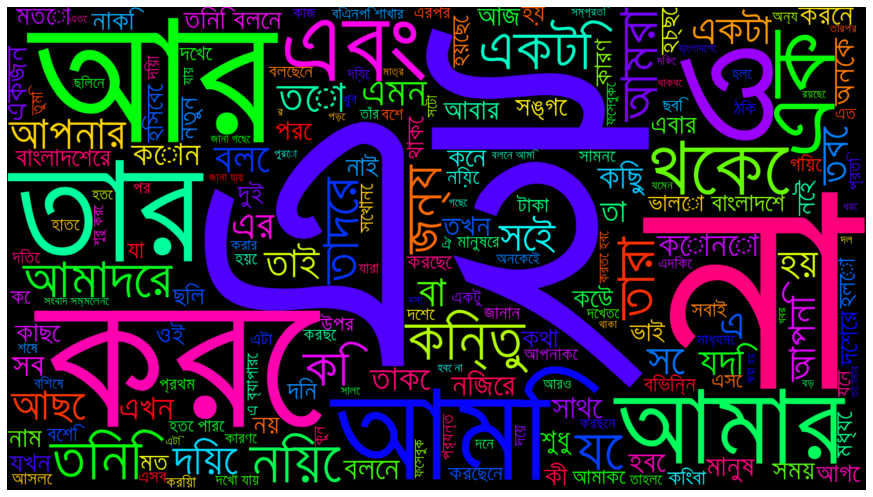

In [ ]:
regex = r"[\u0980-\u09FF]+"

wc = WordCloud(width=1920, height=1080, mode="RGBA", colormap="hsv", font_path="/content/drive/MyDrive/Thesis and Research/dataFiles/Siyamrupali.ttf", regexp=regex).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

###Exploring Fake News

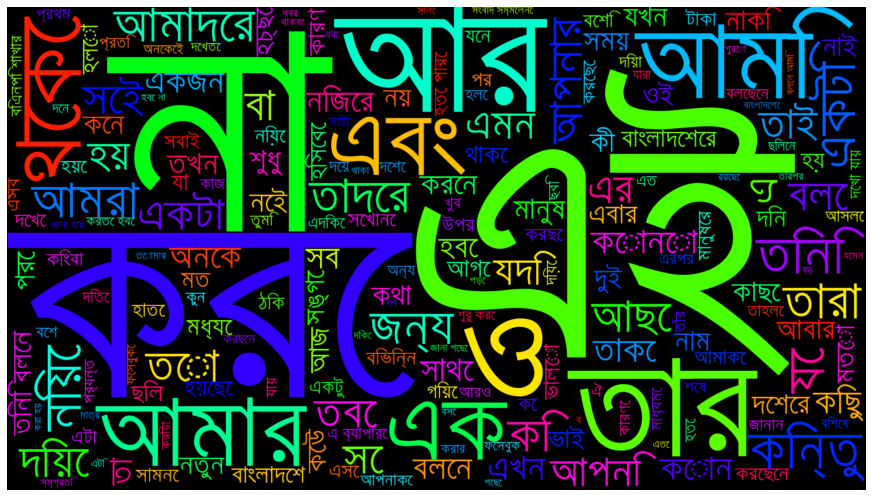

In [ ]:
regex = r"[\u0980-\u09FF]+"

wc = WordCloud(width=1920, height=1080, mode="RGBA", colormap="hsv", font_path="/content/drive/MyDrive/Thesis and Research/dataFiles/Siyamrupali.ttf", regexp=regex).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

##Merging headline and content column

In [ ]:
real['text'] = real['headline'] + " " + real['content']
fake['text'] = fake['headline'] + " " + fake['content']

##Dropping other columns

In [ ]:
real = real[['text', 'label']]

In [ ]:
fake = fake[['text', 'label']]

##Merging Fake and Real data

In [ ]:
data = real.append(fake, ignore_index=True)

In [89]:
data = pd.read_csv('/content/drive/MyDrive/Thesis and Research/dataFiles/real_7k_fake_2653_merged_9855.csv')

In [90]:
data.head()

Unnamed: 0                                           headline  \
0           0          হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ   
1           1                           টস হেরে বোলিংয়ে বাংলাদেশ   
2           2                     রাজধানীতে বিশেষ অভিযানে আটক ৪৩   
3           3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4           4     'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'   

                                             content  class  
0  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...      1  
1  টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...      1  
2  রাজধানীতে বিশেষ অভিযানে আটক ৪৩রাজধানীতে মাদক ব...      1  
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...      1  
4  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...      1

In [ ]:
# columns_to_keep = ['headline', 'content', "label"]
# data = data[columns_to_keep]
# data.head()

headline  \
0          হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ   
1                           টস হেরে বোলিংয়ে বাংলাদেশ   
2                     রাজধানীতে বিশেষ অভিযানে আটক ৪৩   
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4     'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'   

                                             content  label  
0  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...    1.0  
1  টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...    1.0  
2  রাজধানীতে বিশেষ অভিযানে আটক ৪৩রাজধানীতে মাদক ব...    1.0  
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...    1.0  
4  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...    1.0

In [93]:
nan_values = data['class'].isna()
nan_values

0       False
1       False
2       False
3       False
4       False
        ...  
9850    False
9851    False
9852    False
9853    False
9854    False
Name: class, Length: 9855, dtype: bool

In [94]:
value_counts = data['class'].value_counts()
value_counts

1    7202
0    2653
Name: class, dtype: int64

In [95]:
data['merged'] = data['headline'] +" "+ data['content']
data.head()

Unnamed: 0                                           headline  \
0           0          হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ   
1           1                           টস হেরে বোলিংয়ে বাংলাদেশ   
2           2                     রাজধানীতে বিশেষ অভিযানে আটক ৪৩   
3           3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4           4     'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'   

                                             content  class  \
0  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগক্রিক...      1   
1  টস হেরে বোলিংয়ে বাংলাদেশএশিয়া কাপের ষষ্ঠ ম্যাচ...      1   
2  রাজধানীতে বিশেষ অভিযানে আটক ৪৩রাজধানীতে মাদক ব...      1   
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...      1   
4  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...      1   

                                              merged  
0  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...  
1  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...  
2  রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে বিশেষ...  
3  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...  
4  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...

In [96]:
columns_to_drop = ['headline', 'content']
data = data.drop(columns=columns_to_drop)
data.head()

Unnamed: 0  class                                             merged
0           0      1  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...
1           1      1  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...
2           2      1  রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে বিশেষ...
3           3      1  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...
4           4      1  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...

In [97]:
data.rename(columns={'merged': 'content'}, inplace=True)
data.head()

Unnamed: 0  class                                            content
0           0      1  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...
1           1      1  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...
2           2      1  রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে বিশেষ...
3           3      1  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...
4           4      1  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...

#Preprocessing

##Stemmer

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-bk3nrgrb
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-bk3nrgrb
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7620 sha256=032f42b324cca1eb316ec95b50712d858f2ef8b1f82ddaedea4527036e6974ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-37q44g32/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
data.head()

Unnamed: 0                                            content  class
0           0  নৌকা থেকে স্ত্রীকে ফেলে দিল স্বামী, এরপর...বরি...      1
1           1  সুপার ফোরের শিডিউল দেখে ক্ষেপে গেলেন মাশরাফিবা...      1
2           2  নওয়াজের দণ্ড স্থগিত, মুক্তির নির্দেশদ্য রিপোর্...      1
3           3  অসুস্থ থাকায় বৃহস্পতিবার আদালতে যাবেন না খালেদ...      1
4           4  জামায়াতকে বাদ দিয়ে নতুন ধারার রাজনীতির সূচনানত...      1

In [ ]:
pip install bangla-stemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bangla_stemmer.stemmer import stemmer
wordlist = ['কবিরগুলিকে', 'আমাকে', 'নামাবার']
stmr = stemmer.BanglaStemmer()
stm = stmr.stem(wordlist)
print(stm)

applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
['কবির', 'আমা', 'নামা']


In [ ]:
from bangla_stemmer.stemmer.stemmer import BanglaStemmer
word = 'কবিরগুলিকে'
stm = BanglaStemmer().stem(word)
print(stm)

applied first rules..
applied third rules..
কবির


In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 43.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=9eabbfc9ba313b6218bbf299acf090f3b84c163b51dd6b5a2b37ee3ed368d677
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


##Function to Remove Stopwords and puncuations

In [ ]:
def pun(text):
    from bnlp import BasicTokenizer
    tok = BasicTokenizer()
    tokens = tok.tokenize(text)
    x = []

    for i in tokens:
        if i not in punctuations and i not in operators and i not in others and i not in digits:
            
            if i == '‘' or i == '’' or i == '“' or i == "”":
                continue
            else:
                x.append(i)
    t = " ".join(i for i in x)
    return t 

In [ ]:
!pip install bltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached bltk-1.2.tar.gz (17.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for bltk: filename=bltk-1.2-py3-none-any.whl size=17432524 sha256=cbecc2ebc2ae938bf01777e7e32667a80f80bec3f46ad73ec171f7558781baba
  Stored in directory: /root/.cache/pip/wheels/52/7d/57/4806e1ef5d1ad1491ce0ac43aaa0377293efbc9a81d5b7e6c8
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=7b4a03f3277aad515146b767d83723af4515d05cddb38f8c69db19b26d51c906
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built bltk sklearn


In [ ]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)

In [ ]:
def stop(text):
    from bltk.langtools import remove_stopwords
    from bltk.langtools import Tokenizer

    tokenizer = Tokenizer()
    tokened_words = tokenizer.word_tokenizer(text)
    
    x = remove_stopwords(tokened_words, level='moderate')
    t = " ".join(i for i in x)
    return t

##Stemming

In [ ]:
from bltk.langtools import UgraStemmer
from bltk.langtools import Tokenizer


In [ ]:
def stem(sentences):
    sentences = sentences.split()
    stm = stmr.stem(sentences)
    
    return stm

In [ ]:
data.head()

Unnamed: 0                                            content  class
0           0  নৌকা থেকে স্ত্রীকে ফেলে দিল স্বামী, এরপর...বরি...      1
1           1  সুপার ফোরের শিডিউল দেখে ক্ষেপে গেলেন মাশরাফিবা...      1
2           2  নওয়াজের দণ্ড স্থগিত, মুক্তির নির্দেশদ্য রিপোর্...      1
3           3  অসুস্থ থাকায় বৃহস্পতিবার আদালতে যাবেন না খালেদ...      1
4           4  জামায়াতকে বাদ দিয়ে নতুন ধারার রাজনীতির সূচনানত...      1

##Function Call

In [98]:
data['text_pun_stop'] = data['content'].apply(lambda x: pun(str(x)))


In [99]:
data['text_pun_stop'] = data['text_pun_stop'].apply(lambda x: stop(str(x)))

In [100]:
data.head()

Unnamed: 0  class                                            content  \
0           0      1  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...   
1           1      1  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...   
2           2      1  রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে বিশেষ...   
3           3      1  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4           4      1  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...   

                                       text_pun_stop  
0  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...  
1  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...  
2  রাজধানীতে অভিযানে আটক ৪৩ রাজধানীতে অভিযানে আটক...  
3  উস্কানি রোধে নজরদারি সামাজিক যোগাযোগ উস্কানি র...  
4  তেল আসত দিনে আসবে অতি দ্রুত তেল আসত দিনে আসবে ...

In [ ]:
data['stem_text'] = data['text_pun_stop'].apply(lambda x: stem(str(x)))

Streaming output truncated to the last 5000 lines.
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules

In [ ]:
data.head()

label                                            content  \
0    1.0  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...   
1    1.0  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...   
2    1.0  রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে বিশেষ...   
3    1.0  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4    1.0  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...   

                                       text_pun_stop  \
0  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...   
1  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...   
2  রাজধানীতে অভিযানে আটক ৪৩ রাজধানীতে অভিযানে আটক...   
3  উস্কানি রোধে নজরদারি সামাজিক যোগাযোগ উস্কানি র...   
4  তেল আসত দিনে আসবে অতি দ্রুত তেল আসত দিনে আসবে ...   

                                           stem_text  
0  [হঠাৎ, আফগান, ক্রিকেট, বোর্ড, প্রধান, পদত্যাগ,...  
1  [টস, হার, বোলিংয়, বাংলাদেশ, টস, হার, বোলিংয়, ব...  
2  [রাজধানী, অভিযানে, আটক, ৪৩, রাজধানী, অভিযানে, ...  
3  [উস্কানি, রোধে, নজরদারি, সামাজিক, যোগাযোগ, উস্...  
4  [তেল, আসত, দিনে, আসবে, অতি, দ্রুত, তেল, আসত, দ...

#Word Embeddings

##Word2Vec Models

###"Glove

In [ ]:
from bnlp import BengaliGlove
glove_path = '/content/drive/MyDrive/Datasets and Models/BNLP model/bn_glove.100d/bn_glove.100d.txt'
bng = BengaliGlove()
word = 'গ্রাম'
vec = bng.word2vec(glove_path, word)
print(vec)

[-0.717154  0.204319  0.981128 -0.143919 -0.27748   0.537274  0.086825
 -0.041925 -0.385691  0.831834  0.121769  1.001845  1.140069 -0.187503
 -0.035112  0.191228 -0.658263 -0.865595 -0.749927 -1.292613  0.179235
  0.683907  0.626463  0.530042 -0.575438  0.398385 -0.124687  0.059881
  0.624665 -0.297283 -0.788894 -0.33834   0.568544  1.27385   0.771945
  0.18709   0.152484  0.898867  0.305351  0.409124 -1.232125  0.801863
 -0.544444 -0.258698  0.750698  0.153801 -0.088939 -0.657796 -0.744032
  0.005437  0.068823  1.452468 -1.103575  0.125556  0.872267 -0.072597
 -0.593549 -1.112354  0.126317  0.223684  0.177486  0.483259 -0.685185
  0.68014   1.255763 -0.551453  0.022575  0.41832   0.386842  0.006775
  0.7648    0.136363 -0.105026 -0.544173 -0.320443  0.150603 -0.431919
  0.392022  0.127306  0.29251   0.099166 -0.81116  -0.446897  0.732276
  0.689075 -0.235389  0.751264 -0.12757  -0.827087  0.915277 -0.591213
  0.681569  0.277621 -1.82062   0.599809  0.370045  0.153323  0.807469
 -0.29

In [ ]:
word = 'মাতৃভাষা'
vec = bng.word2vec(glove_path, word)
print(vec)

[ 0.878803  0.163299  0.727691 -0.024672 -0.524957  0.248878  0.252458
  0.029489  0.317145 -0.103398 -0.454691  0.063771 -0.17543  -1.307777
  0.009503 -0.723874  0.462036  0.56043  -0.90581  -0.879335  0.526727
 -0.04235   0.957317 -0.340068 -0.114237  1.089092  0.130176  0.177385
  0.384945 -0.642731  0.218898 -0.061273  1.824189  0.804091  0.202202
 -0.402553 -0.083973  0.153774 -0.041398 -0.577255 -0.721584 -0.075267
 -0.406981  0.617999 -0.200616 -0.318428  0.219925  0.311574 -0.750842
  0.117585 -0.33949  -0.515611 -0.271887  0.51321   0.985236 -0.102957
 -0.391273  0.152829 -0.170943  0.339202  0.233179  0.746474  0.41365
 -0.075762  0.03139  -0.580375 -0.360753  0.275794  0.162459  0.349121
 -0.457236 -0.354463  0.470278  0.748983  0.429422  1.184577  0.712153
  0.400271  0.096136 -0.869755  1.136211 -0.106773  0.367183 -0.27978
 -0.465218  0.014368 -0.184939 -0.123483 -0.152964 -0.518938  0.466246
  0.06525   0.668298  0.058694  0.182311 -0.405711  0.097234  0.193181
 -0.4992

###Big model

In [ ]:

from gensim.models import KeyedVectors

In [ ]:

model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Thesis and Research/Datasets and Models/BNLP model/model/bn_w2v_model.text', binary=False)
words = model.most_similar(positive=['প্রধানমন্ত্রী'], negative=[], topn=10)

for w in words:
  print(w[0])

মনমোহন
প্রধানমন্ত্রীর
হাসিনা
রাষ্ট্রপতি
হাসিনার
প্রধানমন্ত্রীকে
শান্তিপথে
বিদেশমন্ত্রী
মনমোহনের
এসডিএফের


In [ ]:
vector = model['প্রধানমন্ত্রী']
vector

array([ 2.69087e-01, -2.66610e-02,  7.58100e-02, -6.78200e-03,
       -5.35660e-02, -8.79370e-02, -2.07028e-01, -6.80460e-02,
        7.28310e-02,  1.89679e-01,  1.85252e-01, -5.52990e-02,
       -6.02450e-02,  4.87610e-02, -1.46224e-01,  5.60720e-02,
        1.06839e-01,  1.96204e-01, -1.22210e-02,  1.94988e-01,
        5.06480e-02,  2.45947e-01,  3.38357e-01, -2.12400e-03,
       -1.95300e-02, -1.30105e-01, -8.13180e-02, -5.72620e-02,
        1.44294e-01,  1.77986e-01,  2.68190e-02, -2.26740e-01,
       -1.64151e-01,  2.52168e-01, -3.06169e-01, -1.23330e-02,
        1.39819e-01,  8.61550e-02, -3.71860e-02,  1.63239e-01,
       -9.39760e-02,  3.61890e-02, -1.30990e-02,  4.87070e-02,
       -1.41940e-01,  1.02682e-01, -2.25119e-01,  5.63760e-02,
       -1.03305e-01, -1.43948e-01, -2.16863e-01,  2.58318e-01,
       -5.07180e-02,  1.12299e-01, -1.22830e-01, -1.23497e-01,
       -8.87480e-02,  2.75765e-01,  2.27037e-01, -9.75960e-02,
        7.39330e-02, -6.94610e-02,  2.61699e-01,  2.803

##Function to do Word Embeddings

In [101]:
data['text_pun_stop'] = data["text_pun_stop"].apply(lambda x : x.split())

In [102]:
data.head()

Unnamed: 0  class                                            content  \
0           0      1  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...   
1           1      1  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...   
2           2      1  রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে বিশেষ...   
3           3      1  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4           4      1  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...   

                                       text_pun_stop  
0  [হঠাৎ, আফগান, ক্রিকেট, বোর্ড, প্রধানের, পদত্যা...  
1  [টস, হেরে, বোলিংয়ে, বাংলাদেশ, টস, হেরে, বোলিংয়...  
2  [রাজধানীতে, অভিযানে, আটক, ৪৩, রাজধানীতে, অভিযা...  
3  [উস্কানি, রোধে, নজরদারি, সামাজিক, যোগাযোগ, উস্...  
4  [তেল, আসত, দিনে, আসবে, অতি, দ্রুত, তেল, আসত, দ...

In [ ]:
def average_vector(sentence_list):
    
    word_embeddings = []
    for word in sentence_list:
        try:
            vec_300d = np.array(model[word])
            word_embeddings.append(vec_300d)
        except:
            continue
    
    if len(word_embeddings) > 0:
        average_embedding = np.mean(word_embeddings, axis=0)
    else:
        average_embedding = np.zeros(300)

    return average_embedding

In [ ]:
data.head()

label                                            content  \
0    1.0  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...   
1    1.0  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...   
2    1.0  রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে বিশেষ...   
3    1.0  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4    1.0  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...   

                                       text_pun_stop  \
0  [হঠাৎ, আফগান, ক্রিকেট, বোর্ড, প্রধানের, পদত্যা...   
1  [টস, হেরে, বোলিংয়ে, বাংলাদেশ, টস, হেরে, বোলিংয়...   
2  [রাজধানীতে, অভিযানে, আটক, ৪৩, রাজধানীতে, অভিযা...   
3  [উস্কানি, রোধে, নজরদারি, সামাজিক, যোগাযোগ, উস্...   
4  [তেল, আসত, দিনে, আসবে, অতি, দ্রুত, তেল, আসত, দ...   

                                           stem_text  
0  [হঠাৎ, আফগান, ক্রিকেট, বোর্ড, প্রধান, পদত্যাগ,...  
1  [টস, হার, বোলিংয়, বাংলাদেশ, টস, হার, বোলিংয়, ব...  
2  [রাজধানী, অভিযানে, আটক, ৪৩, রাজধানী, অভিযানে, ...  
3  [উস্কানি, রোধে, নজরদারি, সামাজিক, যোগাযোগ, উস্...  
4  [তেল, আসত, দিনে, আসবে, অতি, দ্রুত, তেল, আসত, দ...

In [ ]:

average_vector(data['stem_text'][0]).shape

(300,)

In [ ]:

from bnlp import NLTKTokenizer

bnltk = NLTKTokenizer()

In [ ]:
test = bnltk.word_tokenize(data['text_pun_stop'][0])
average_vector(test)

TypeError: ignored

##Making Vector Column

In [103]:
data['stem_vector'] = data['text_pun_stop'].apply(lambda x : average_vector(x))


In [104]:
data.head()

Unnamed: 0  class                                            content  \
0           0      1  হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ হঠাৎ...   
1           1      1  টস হেরে বোলিংয়ে বাংলাদেশ টস হেরে বোলিংয়ে বাংলা...   
2           2      1  রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে বিশেষ...   
3           3      1  উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...   
4           4      1  'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'...   

                                       text_pun_stop  \
0  [হঠাৎ, আফগান, ক্রিকেট, বোর্ড, প্রধানের, পদত্যা...   
1  [টস, হেরে, বোলিংয়ে, বাংলাদেশ, টস, হেরে, বোলিংয়...   
2  [রাজধানীতে, অভিযানে, আটক, ৪৩, রাজধানীতে, অভিযা...   
3  [উস্কানি, রোধে, নজরদারি, সামাজিক, যোগাযোগ, উস্...   
4  [তেল, আসত, দিনে, আসবে, অতি, দ্রুত, তেল, আসত, দ...   

                                         stem_vector  
0  [0.06085515, 0.09772422, -0.061557967, 0.08586...  
1  [0.05995659, 0.1384916, -0.12644649, 0.0605452...  
2  [-0.18357618, 0.013685586, -0.021172903, -0.03...  
3  [-0.113535605, 0.075963624, 0.032689475, -0.00...  
4  [-0.0697403, 0.101660006, -0.012137481, -0.037...

In [ ]:
data['stem_vector'][0].type

AttributeError: ignored

#Trainning and Evaluating

##Creating input variable 

In [105]:
X = data['stem_vector'].to_list()

In [106]:
X

[array([ 6.08551502e-02,  9.77242216e-02, -6.15579672e-02,  8.58635157e-02,
        -2.75261812e-02,  2.29874149e-01, -8.94504711e-02,  7.73554370e-02,
        -4.80147339e-02,  6.24696463e-02, -6.47092536e-02, -3.86499390e-02,
         3.82536985e-02,  1.64140716e-01, -8.37855134e-03,  5.32389209e-02,
         1.18142150e-01,  3.19653712e-02,  1.71836555e-01,  1.39050156e-01,
        -4.56615202e-02,  1.64120104e-02,  1.46830827e-01, -6.15532361e-02,
        -1.77588165e-02, -4.61947657e-02,  3.55462097e-02,  3.23950090e-02,
         5.99262528e-02,  5.02850339e-02, -5.71658053e-02,  1.35573531e-02,
         2.50303261e-02,  7.64182210e-02, -1.45559803e-01, -5.45902923e-02,
         1.36673171e-02, -6.65093362e-02, -8.80631208e-02,  1.39290109e-01,
         8.61841887e-02, -4.94906195e-02, -3.00537776e-02, -6.24208860e-02,
         8.27420130e-02,  7.11304620e-02,  2.35903468e-02, -1.08968958e-01,
        -7.58136585e-02, -4.26933030e-03, -5.47656007e-02,  2.83483695e-02,
        -6.2

In [ ]:
rows_with_nan = data[data['label'].isna()]

In [ ]:
rows_with_nan

label                                            content  \
8501    NaN  টিটুর পাছায় ফোঁড়া হয়েছে ! সবার দোয়াপ্রার্থ...   
8502    NaN  পাঁচ মাস বগলের লোম না কাটায় বউ চলে গেলো যশোরে...   
8503    NaN  সবার আগে চাঁদ দেখতে পেয়েছে যশোরের আরাফাত সবার ...   
8504    NaN  নোয়াখালীতে চ‍াঁদ দেখা গেছে মোট তিনটা ! নোয়াখাল...   
8505    NaN  বৃষ্টিতে সিগারেট ভিজে যাওয়ায় অঝোরে কাঁদছে পথ...   
...     ...                                                ...   
9850    NaN  লাগাও অ্যাপস ব্যবহার করে উপকার পেয়েছেন ফরিদপুর...   
9851    NaN  ফেসবুকে সন্তানের ছবি পোস্ট করার আগে আরেকবার ভা...   
9852    NaN  ফেসবুক অ্যাকাউন্ট ডিএক্টিভেট করতে লাগবে ৭০ হাজ...   
9853    NaN  ব্যাচেলরদের দুঃখ ঘোচাতে বাজারে আসলো রোবট বধূ ব...   
9854    NaN  এখন থেকে আর এডিট করা ছবি আপলোড দেয়া যাবেনা : ...   

                                          text_pun_stop  \
8501  [টিটুর, পাছায়, ফোঁড়া, দোয়াপ্রার্থী, টিটুর, ...   
8502  [পাঁচ, মাস, বগলের, লোম, কাটায়, বউ, গেলো, যশোর...   
8503  [চাঁদ, পেয়েছে, যশোরের, আরাফাত, চাঁদ, পেয়েছে, য...   
8504  [নোয়াখালীতে, চ‍াঁদ, তিনটা, নোয়াখালীতে, চ‍াঁদ, ...   
8505  [বৃষ্টিতে, সিগারেট, ভিজে, যাওয়ায়, অঝোরে, কাঁ...   
...                                                 ...   
9850  [লাগাও, অ্যাপস, উপকার, পেয়েছেন, ফরিদপুরের, মিজ...   
9851  [ফেসবুকে, সন্তানের, ছবি, পোস্ট, আরেকবার, ভাবুন...   
9852  [ফেসবুক, অ্যাকাউন্ট, ডিএক্টিভেট, লাগবে, ৭০, টা...   
9853  [ব্যাচেলরদের, দুঃখ, ঘোচাতে, বাজারে, আসলো, রোবট...   
9854  [এডিট, ছবি, আপলোড, দেয়া, যাবেনা, ফেসবুক, এডিট...   

                                              stem_text  \
8501  [টিটুর, পাছায়, ফোঁড়া, দোয়াপ্রার্থী, টিটুর, ...   
8502  [পাঁচ, মাস, বগল, লোম, কাটায়, বউ, গেলো, যশোর, ...   
8503  [চাঁদ, পায়, যশোর, আরাফাত, চাঁদ, পায়, যশোর, আরা...   
8504  [নোয়াখালী, চ‍াঁদ, তিন, নোয়াখালী, চ‍াঁদ, তিন, র...   
8505  [বৃষ্, সিগারেট, ভিজে, যাওয়ায়, অঝোরে, কাঁদ, প...   
...                                                 ...   
9850  [লাগা, অ্যাপস, উপক, পেয়েছেন, ফরিদপুর, মিজান, ল...   
9851  [ফেসবু, সন্তান, ছবি, পোস্ট, আরেকব, ভাবুন, ফেসব...   
9852  [ফেসবুক, অ্যাকাউন্ট, ডিএক্টিভেট, লাগবে, ৭০, টা...   
9853  [ব্যাচেলর, দুঃখ, ঘোচা, বাজারে, আসলো, রোবট, বধূ...   
9854  [এডিট, ছবি, আপলোড, দেয়া, যাবেনা, ফেসবুক, এডিট...   

                                            stem_vector  
8501  [-0.028153542, 0.10525932, -0.0083613945, 0.09...  
8502  [-0.10722844, 0.20098646, 0.011958092, 0.09194...  
8503  [-0.06703334, 0.16177964, 0.0050789746, 0.0578...  
8504  [-0.083613716, 0.046129093, 0.025674662, -0.01...  
8505  [-0.053897794, 0.18457413, -0.0736847, 0.04844...  
...                                                 ...  
9850  [-0.08985197, 0.11296152, -0.029238481, 0.0308...  
9851  [-0.01877561, 0.099068254, -0.035030518, -0.05...  
9852  [-0.06716921, 0.090383194, 0.0025493423, -0.03...  
9853  [-0.08336997, 0.18855825, 0.051210452, 0.00509...  
9854  [-0.044794273, 0.117286794, -0.024139076, -0.0...  

[1354 rows x 5 columns]

###Target Variables

In [108]:
Y = data['class'].values

In [109]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

##Logistic Regression

In [111]:
from matplotlib import pyplot as plt
import seaborn as sn

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
model = LogisticRegression()

In [114]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###Testing on Training Data

In [115]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [116]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.921740233384069


In [117]:
from sklearn.metrics import classification_report

In [118]:
Y_pred = model.predict(X_train)
print(classification_report(Y_train,  Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84      2122
           1       0.93      0.97      0.95      5762

    accuracy                           0.92      7884
   macro avg       0.92      0.88      0.90      7884
weighted avg       0.92      0.92      0.92      7884



###Testing on Test Data

In [119]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [120]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9036022323693557


In [121]:
from sklearn.metrics import classification_report

In [122]:
Y_pred = model.predict(X_test)
print(classification_report(Y_test,  Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       531
           1       0.92      0.95      0.94      1440

    accuracy                           0.90      1971
   macro avg       0.89      0.86      0.87      1971
weighted avg       0.90      0.90      0.90      1971



Text(95.72222222222221, 0.5, 'Truth')

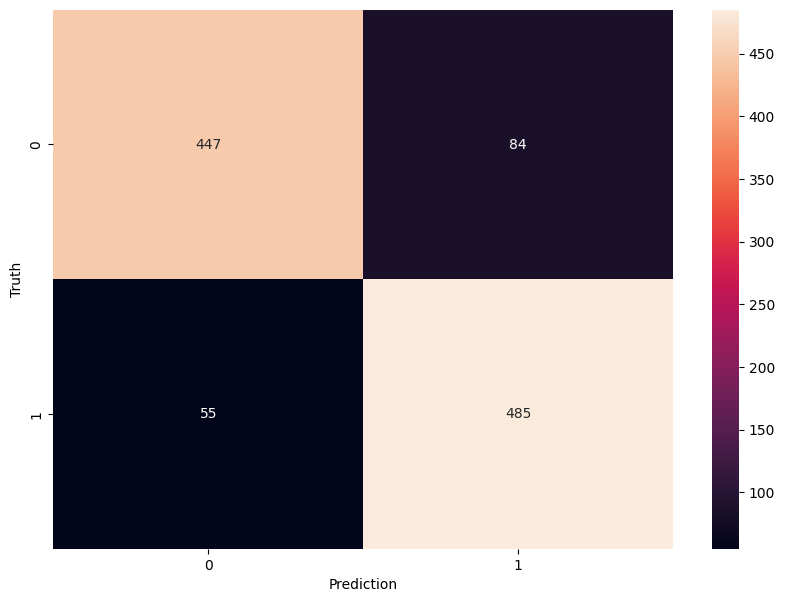

In [ ]:
cm_LR = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_LR, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
X_new = X_test[2]
X_new = X_new.reshape(1, -1)
prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Fake


In [ ]:
print(Y_test[2])

0


#Logistic Regression SMOTE

In [123]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [125]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train,Y_train)

In [126]:
model.fit(X_train_smote, Y_train_smote)

LogisticRegression()

In [142]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [143]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.915144596651446


In [144]:
Y_pred = model.predict(X_train_smote)
print(classification_report(Y_train_smote,  Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5762
           1       0.89      0.93      0.91      5762

    accuracy                           0.91     11524
   macro avg       0.91      0.91      0.91     11524
weighted avg       0.91      0.91      0.91     11524



Text(95.72222222222221, 0.5, 'Truth')

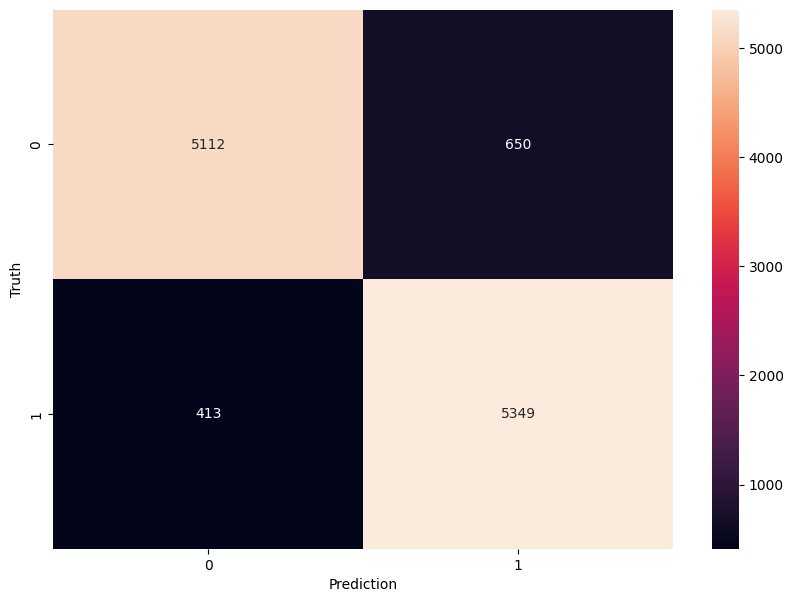

In [146]:
cm_LR = confusion_matrix(Y_train_smote, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_LR, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [138]:
# accuracy score on the training data
X_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [139]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9036022323693557


In [140]:
Y_pred = model.predict(X_test)
print(classification_report(Y_test,  Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       531
           1       0.95      0.91      0.93      1440

    accuracy                           0.90      1971
   macro avg       0.86      0.89      0.87      1971
weighted avg       0.90      0.90      0.90      1971



Text(95.72222222222221, 0.5, 'Truth')

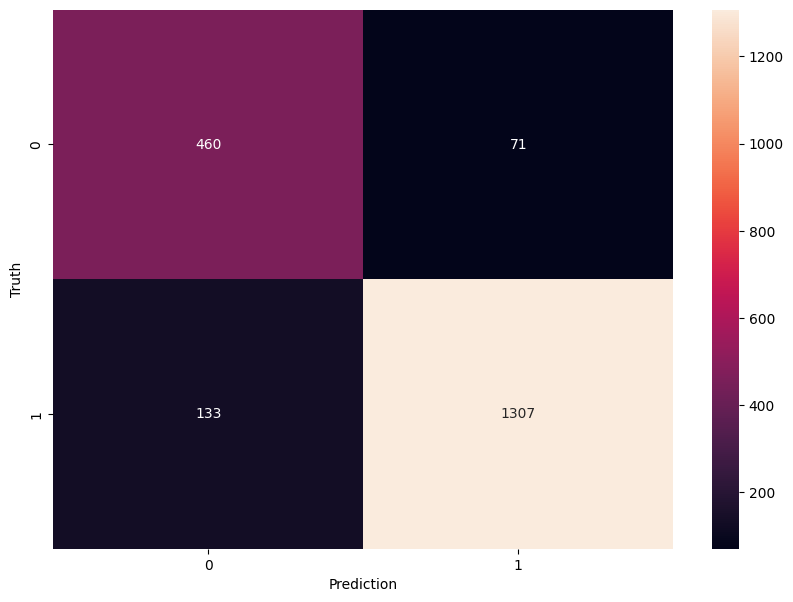

In [141]:
cm_LR = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_LR, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
import pickle

In [ ]:
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [ ]:
X_new = X_test[400]
X_new = X_new.reshape(1, -1)
prediction = mp.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Real


In [ ]:
print(Y_test[400])

1


In [ ]:
X_data = 'গাজীপুর সিটি করপোরেশনকে আমি একটি পরিকল্পিত নগর হিসেবে গড়ে তুলতে চাই। শিল্পপ্রধান গাজীপুরে বসতি দিন দিন বাড়ছে। এ জন্য এই সিটি করপোরেশনকে চারটি জোনে (অঞ্চলে) ভাগ করতে চাই। সেগুলো হচ্ছে—আবাসিক, শিল্প, বাণিজ্যিক ও বাস্তব অবস্থা বিবেচনা করে স্বাস্থ্যসেবা–সংক্রান্ত অঞ্চল। পরিকল্পনার কারণ হচ্ছে, আমরা আগামী প্রজন্মকে এই অসুস্থ পরিবেশে রেখে যেতে পারি না। আমি আমার পরিকল্পনাকে তিন স্তরে ভাগ করেছি। যারা এই লাইনে অভিজ্ঞ, তাদের নিয়ে পরিকল্পনা করে কাজটি করব, যদি আমি জয়ী হই। আমি গাজীপুর সিটি করপোরেশনকে দুর্নীতিমুক্ত সিটি করপোরেশন হিসেবে গড়ে তুলব। আমার নামে এক টাকার দুর্নীতিও নাই। এত দিন গাজীপুর সিটি করপোরেশনে যে বাজেট ও বরাদ্দ হয়েছে, তার সঠিক ব্যবহার হয়নি। যদি সঠিক ব্যবহার হতো, তাহলে আরও উন্নত হয়ে যেত। আজ এখানে কবরস্থান নেই, খেলার মাঠ নেই। এককথায় কিছুই নেই।'
X_data = X_data.split()
X_data

['গাজীপুর',
 'সিটি',
 'করপোরেশনকে',
 'আমি',
 'একটি',
 'পরিকল্পিত',
 'নগর',
 'হিসেবে',
 'গড়ে',
 'তুলতে',
 'চাই।',
 'শিল্পপ্রধান',
 'গাজীপুরে',
 'বসতি',
 'দিন',
 'দিন',
 'বাড়ছে।',
 'এ',
 'জন্য',
 'এই',
 'সিটি',
 'করপোরেশনকে',
 'চারটি',
 'জোনে',
 '(অঞ্চলে)',
 'ভাগ',
 'করতে',
 'চাই।',
 'সেগুলো',
 'হচ্ছে—আবাসিক,',
 'শিল্প,',
 'বাণিজ্যিক',
 'ও',
 'বাস্তব',
 'অবস্থা',
 'বিবেচনা',
 'করে',
 'স্বাস্থ্যসেবা–সংক্রান্ত',
 'অঞ্চল।',
 'পরিকল্পনার',
 'কারণ',
 'হচ্ছে,',
 'আমরা',
 'আগামী',
 'প্রজন্মকে',
 'এই',
 'অসুস্থ',
 'পরিবেশে',
 'রেখে',
 'যেতে',
 'পারি',
 'না।',
 'আমি',
 'আমার',
 'পরিকল্পনাকে',
 'তিন',
 'স্তরে',
 'ভাগ',
 'করেছি।',
 'যারা',
 'এই',
 'লাইনে',
 'অভিজ্ঞ,',
 'তাদের',
 'নিয়ে',
 'পরিকল্পনা',
 'করে',
 'কাজটি',
 'করব,',
 'যদি',
 'আমি',
 'জয়ী',
 'হই।',
 'আমি',
 'গাজীপুর',
 'সিটি',
 'করপোরেশনকে',
 'দুর্নীতিমুক্ত',
 'সিটি',
 'করপোরেশন',
 'হিসেবে',
 'গড়ে',
 'তুলব।',
 'আমার',
 'নামে',
 'এক',
 'টাকার',
 'দুর্নীতিও',
 'নাই।',
 'এত',
 'দিন',
 'গাজীপুর',
 'সিটি',
 'করপোরেশনে',
 'যে',
 'বাজেট',
 'ও',


In [ ]:
# X_data = X_test[2]
X_data = X_new.reshape(1, -1)
prediction = mp.predict(X_data)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Real


In [ ]:
data.head(10)

Unnamed: 0                                            content  class  \
0           0  নৌকা থেকে স্ত্রীকে ফেলে দিল স্বামী, এরপর...বরি...      1   
1           1  সুপার ফোরের শিডিউল দেখে ক্ষেপে গেলেন মাশরাফিবা...      1   
2           2  নওয়াজের দণ্ড স্থগিত, মুক্তির নির্দেশদ্য রিপোর্...      1   
3           3  অসুস্থ থাকায় বৃহস্পতিবার আদালতে যাবেন না খালেদ...      1   
4           4  জামায়াতকে বাদ দিয়ে নতুন ধারার রাজনীতির সূচনানত...      1   
5           5  সরকার আমাকে নির্বাসনে পাঠিয়েছে: নতুন বইয়ে বিচা...      1   
6           6  ফেনীতে স্ত্রীর লাশ হাসপাতালে রেখে ঘাতক স্বামী ...      1   
7           7  নেদারল্যান্ডে ৫০ লাখ ডলারের পণ্য রফতানি করবে প...      1   
8           8  পান্ডিয়া, অক্ষয়ের বদলে ভারত স্কোয়াডে চাহার, সি...      1   
9           9  অজিতের ‘নেতিবাচক’ মন্তব্যে মাশরাফির পাশে দাঁড়া...      1   

                                       text_pun_stop  \
0  [নৌকা, স্ত্রীকে, ফেলে, দিল, স্বামী, এরপর, বরিশ...   
1  [সুপার, ফোরের, শিডিউল, ক্ষেপে, গেলেন, মাশরাফিব...   
2  [নওয়াজের, দণ্ড, স্থগিত, মুক্তির, নির্দেশদ্য, র...   
3  [অসুস্থ, থাকায়, বৃহস্পতিবার, আদালতে, যাবেন, খা...   
4  [জামায়াতকে, বাদ, দিয়ে, ধারার, রাজনীতির, সূচনান...   
5  [সরকার, নির্বাসনে, পাঠিয়েছে, বইয়ে, বিচারপতি, স...   
6  [ফেনীতে, স্ত্রীর, লাশ, হাসপাতালে, ঘাতক, স্বামী...   
7  [নেদারল্যান্ডে, ৫০, লাখ, ডলারের, পণ্য, রফতানি,...   
8  [পান্ডিয়া, অক্ষয়ের, ভারত, স্কোয়াডে, চাহার, সিদ...   
9  [অজিতের, নেতিবাচক, মন্তব্যে, মাশরাফির, পাশে, দ...   

                                         stem_vector  
0  [-0.13068826, 0.027489899, 0.04608388, -0.0223...  
1  [0.044393696, 0.12878437, -0.13106143, 0.06218...  
2  [-0.016747374, -0.017929915, 0.07864205, -0.01...  
3  [-0.08159914, 0.0013228673, 0.04487759, -0.058...  
4  [-0.057053417, 0.08546512, -0.009853681, 0.050...  
5  [0.0019508096, 0.0057215593, 0.046736315, -0.0...  
6  [-0.13807225, 0.004326026, 0.06417189, 0.02013...  
7  [-0.06920409, 0.11493764, -0.07878347, -0.0446...  
8  [0.077048466, 0.14193524, -0.09271171, 0.02828...  
9  [0.060345825, 0.0995779, -0.09301432, 0.057573...

##Naive Bayes

In [148]:
X_train_2d = np.stack(X_train_smote)
X_test_2d = np.stack(X_test)

In [150]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

scaler = MinMaxScaler()
scaled_trained_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

clf_NB = MultinomialNB()
clf_NB.fit(scaled_trained_embed, Y_train_smote)

MultinomialNB()

In [151]:
y_pred = clf_NB.predict(scaled_test_embed)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.83      0.70       531
           1       0.93      0.80      0.86      1440

    accuracy                           0.81      1971
   macro avg       0.76      0.81      0.78      1971
weighted avg       0.84      0.81      0.81      1971



###Testing on Training Data

In [176]:
# accuracy score on the training data
X_train_prediction = clf_NB.predict(X_train_2d)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train_smote)

In [177]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.77499132245748


In [185]:
y_pred = clf_NB.predict(scaled_trained_embed)

print(classification_report(Y_train_smote, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      5762
           1       0.84      0.81      0.82      5762

    accuracy                           0.83     11524
   macro avg       0.83      0.83      0.83     11524
weighted avg       0.83      0.83      0.83     11524



Text(95.72222222222221, 0.5, 'Truth')

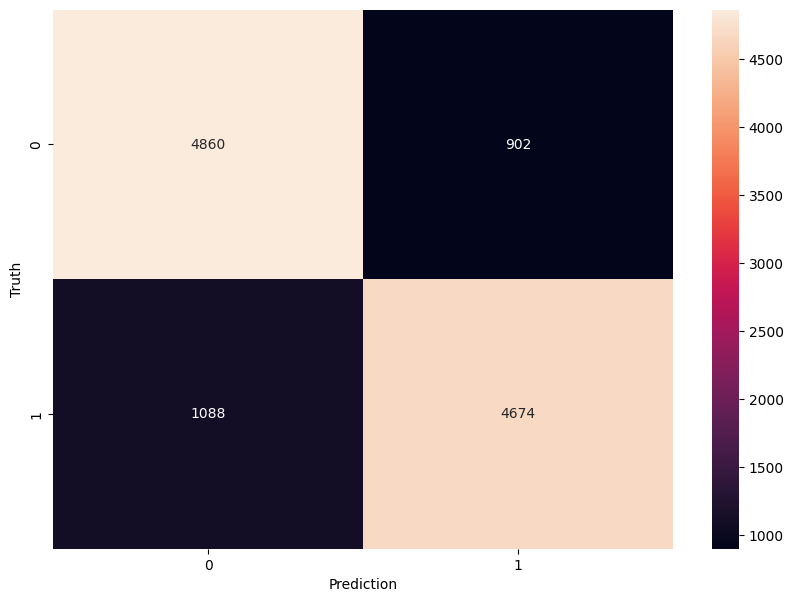

In [186]:
cm_DT = confusion_matrix(Y_train_smote, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

###Testing on Test Data

In [156]:
# accuracy score on the test data
X_test_prediction = clf_NB.predict(X_test_2d)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [157]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8264840182648402


In [158]:
y_pred = clf_NB.predict(scaled_test_embed)

Text(95.72222222222221, 0.5, 'Truth')

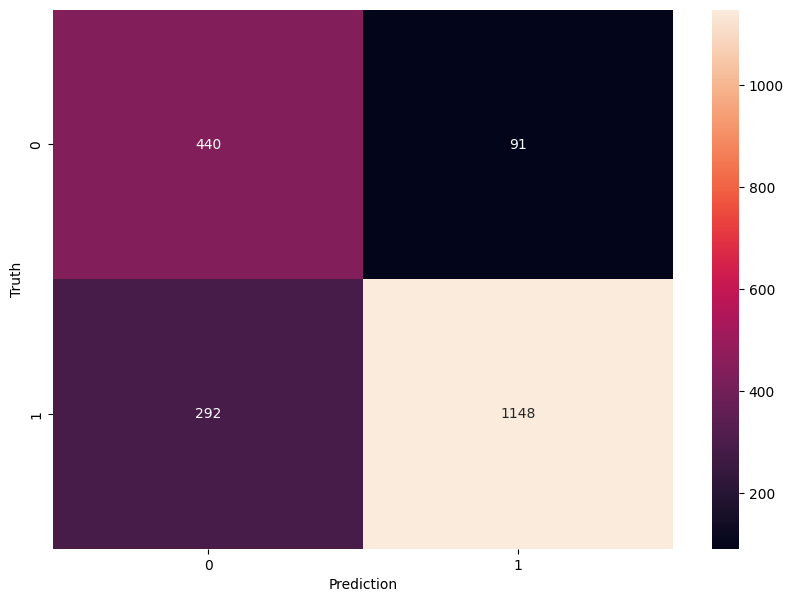

In [159]:
cm_NB = confusion_matrix(Y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_NB, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

##Decision Tree

In [169]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train_2d, Y_train_smote)
Y_pred = clf_DT.predict(X_train_2d)

print(classification_report(Y_train_smote, Y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5762
           1       1.00      0.98      0.99      5762

    accuracy                           0.99     11524
   macro avg       0.99      0.99      0.99     11524
weighted avg       0.99      0.99      0.99     11524



In [163]:
# accuracy score on the training data
X_train_prediction = clf_DT.predict(X_train_2d)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train_smote)

In [164]:

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9914960083304408


Text(95.72222222222221, 0.5, 'Truth')

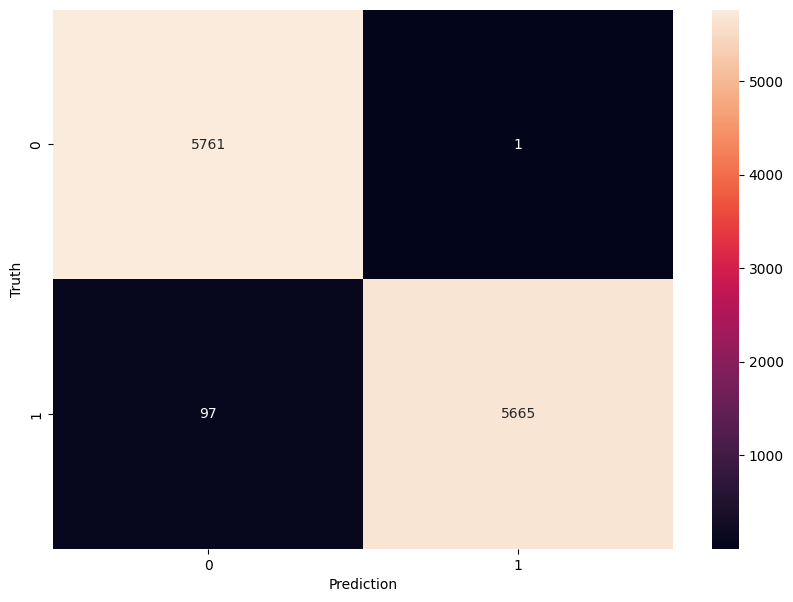

In [171]:
cm_DT = confusion_matrix(Y_train_smote, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [165]:
# accuracy score on the test data
X_test_prediction = clf_DT.predict(X_test_2d)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [166]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8259766615930999


In [167]:
Y_pred = clf_DT.predict(X_test_2d)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       531
           1       0.91      0.84      0.88      1440

    accuracy                           0.83      1971
   macro avg       0.78      0.81      0.79      1971
weighted avg       0.84      0.83      0.83      1971



Text(95.72222222222221, 0.5, 'Truth')

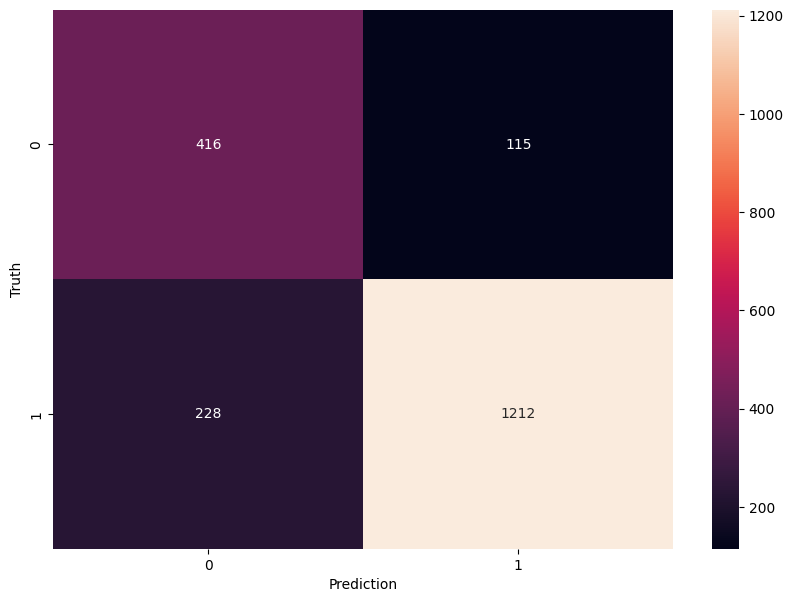

In [168]:
cm_DT = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

##Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF.fit(X_train_2d, Y_train_smote)
Y_pred = clf_RF.predict(X_train_2d)

print(classification_report(Y_train_smote, Y_pred))


# from sklearn.tree import DecisionTreeClassifier

# clf_DT = DecisionTreeClassifier()
# clf_DT.fit(X_train_2d, Y_train)
# Y_pred = clf_DT.predict(X_train_2d)

# print(classification_report(Y_train, Y_pred))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5762
           1       0.99      0.99      0.99      5762

    accuracy                           0.99     11524
   macro avg       0.99      0.99      0.99     11524
weighted avg       0.99      0.99      0.99     11524



In [188]:
# accuracy score on the test data
X_train_prediction = clf_RF.predict(X_train_2d)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train_smote)

In [189]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9914960083304408


Text(95.72222222222221, 0.5, 'Truth')

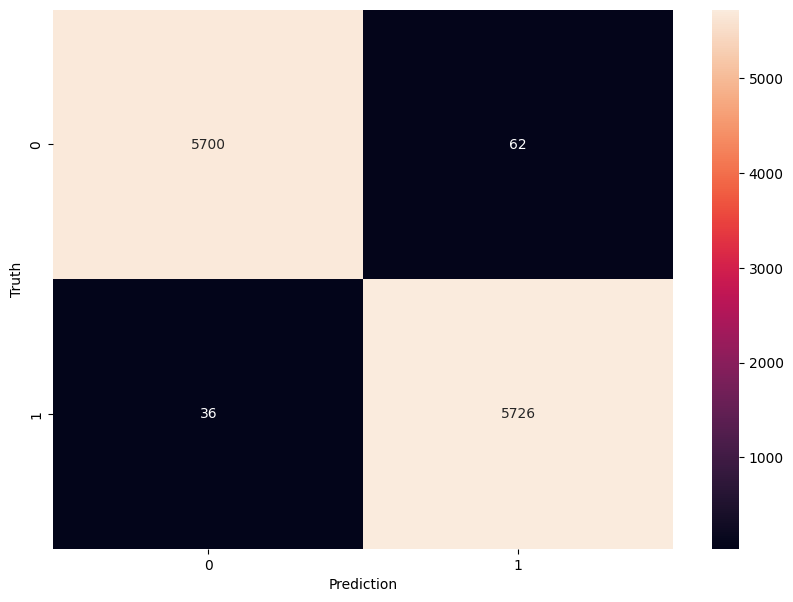

In [190]:
cm_DT = confusion_matrix(Y_train_smote, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [192]:
y_pred = clf_RF.predict(X_train_2d)

print(classification_report(Y_train_smote, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5762
           1       0.99      0.99      0.99      5762

    accuracy                           0.99     11524
   macro avg       0.99      0.99      0.99     11524
weighted avg       0.99      0.99      0.99     11524



In [193]:
# accuracy score on the test data
X_test_prediction = clf_RF.predict(X_test_2d)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [194]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9081684424150177


In [196]:
Y_pred = clf_RF.predict(X_test_2d)

print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       531
           1       0.94      0.93      0.94      1440

    accuracy                           0.91      1971
   macro avg       0.88      0.89      0.88      1971
weighted avg       0.91      0.91      0.91      1971



Text(95.72222222222221, 0.5, 'Truth')

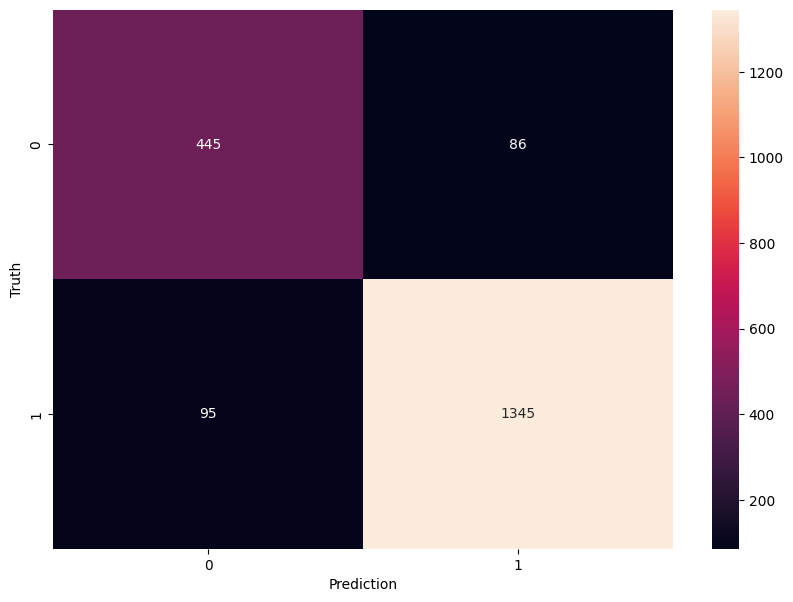

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [205]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

clf.fit(X_train_2d, Y_train_smote)

Y_pred = clf.predict(X_train_2d)

print(classification_report(Y_train_smote, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5762
           1       0.99      0.92      0.95      5762

    accuracy                           0.95     11524
   macro avg       0.95      0.95      0.95     11524
weighted avg       0.95      0.95      0.95     11524



In [199]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train_smote)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train_smote)

In [200]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9077577230128427


Text(95.72222222222221, 0.5, 'Truth')

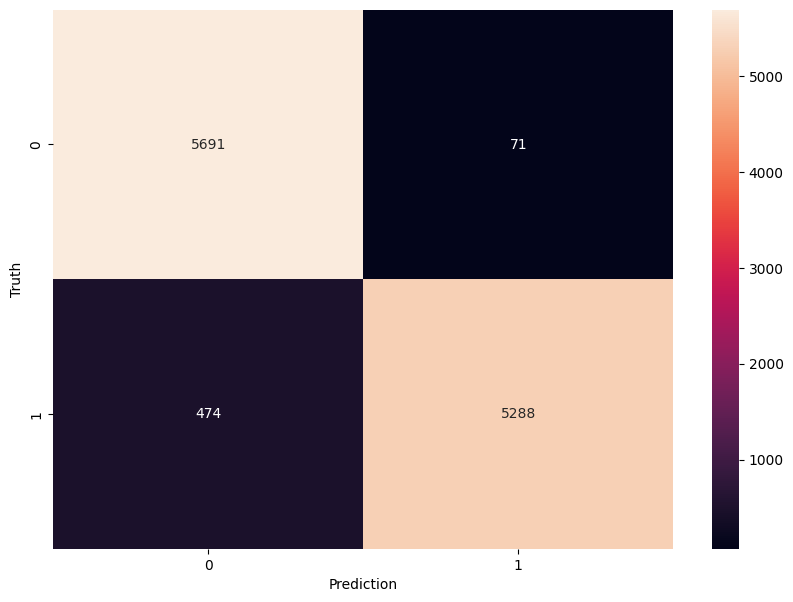

In [206]:
cm_DT = confusion_matrix(Y_train_smote, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [201]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [202]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8964992389649924


In [203]:
Y_pred = clf.predict(X_test_2d)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       531
           1       0.96      0.85      0.90      1440

    accuracy                           0.87      1971
   macro avg       0.83      0.88      0.85      1971
weighted avg       0.89      0.87      0.87      1971



Text(95.72222222222221, 0.5, 'Truth')

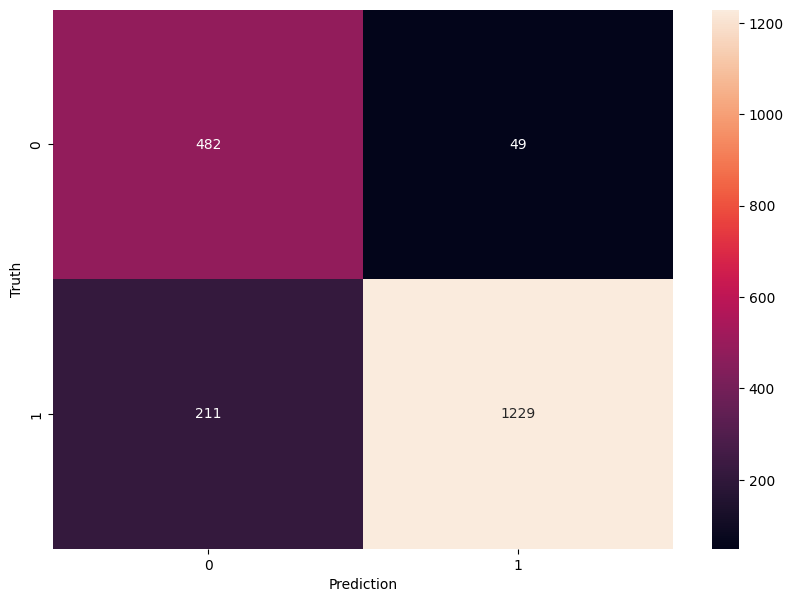

In [204]:
cm_KNN = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_KNN, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [207]:
X_new = X_test[50]
X_new = X_new.reshape(1, -1)
prediction = clf.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Fake


In [208]:
print(Y_test[50])

0


In [209]:
X_new = X_test[30]
X_new = X_new.reshape(1, -1)
prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Real


In [210]:
print(Y_test[30])

1


##Naive Bayes Again

In [ ]:
clf = MultinomialNB(alpha=1.0) # You can adjust the smoothing parameter alpha to improve performance
clf.fit(X_train, Y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: ignored

In [212]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features to be between 0 and 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)

# Train the Naive Bayes model
clf = MultinomialNB(alpha=5.0)
clf.fit(X_train_scaled, Y_train_smote)

# Scale the features in the testing set and predict the labels
X_test_scaled = scaler.transform(X_test)
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8056823947234906


In [213]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.83      0.70       531
           1       0.93      0.80      0.86      1440

    accuracy                           0.81      1971
   macro avg       0.76      0.81      0.78      1971
weighted avg       0.84      0.81      0.81      1971



Text(95.72222222222221, 0.5, 'Truth')

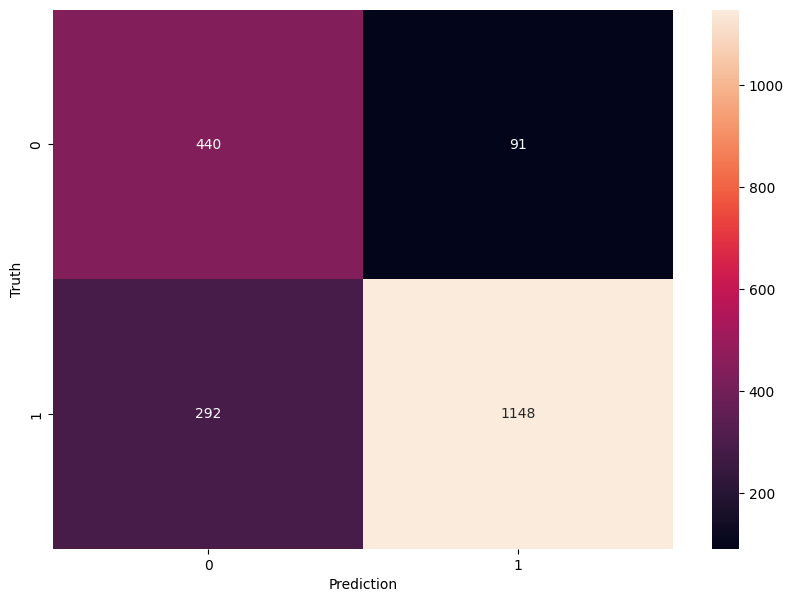

In [214]:
cm = confusion_matrix(Y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [217]:
X_train_scaled = scaler.transform(X_train_smote)
Y_pred = clf.predict(X_train_scaled)

accuracy = accuracy_score(Y_train_smote, Y_pred)
print("Accuracy score on trainning data:", accuracy)

Accuracy score on trainning data: 0.8275772301284277


In [219]:
print(classification_report(Y_train_smote, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      5762
           1       0.84      0.81      0.82      5762

    accuracy                           0.83     11524
   macro avg       0.83      0.83      0.83     11524
weighted avg       0.83      0.83      0.83     11524



#Gausian Naive Bayes

In [223]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assume X is a 2D numpy array of shape (n_samples, n_features) containing the feature vectors
# and y is a 1D numpy array of shape (n_samples,) containing the binary class labels

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes model
clf = GaussianNB()
clf.fit(X_train_smote, Y_train_smote)

# Predict on the testing set
Y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8143074581430746


In [224]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.79      0.70       531
           1       0.91      0.82      0.87      1440

    accuracy                           0.81      1971
   macro avg       0.77      0.81      0.78      1971
weighted avg       0.83      0.81      0.82      1971



Text(95.72222222222221, 0.5, 'Truth')

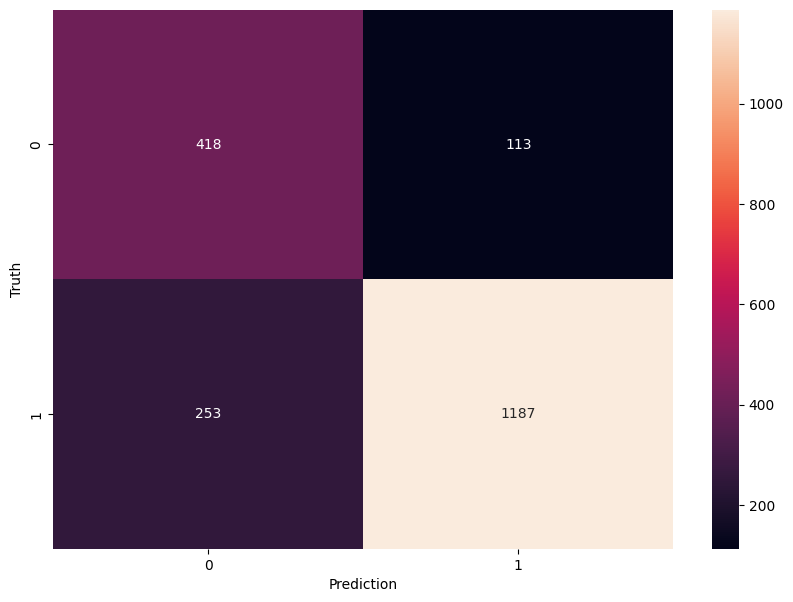

In [226]:
cm_DT = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [228]:
Y_pred = clf.predict(X_train_smote)

# Calculate the accuracy score
accuracy = accuracy_score(Y_train_smote, Y_pred)
print("Accuracy on training data:", accuracy)

Accuracy on training data: 0.8470149253731343


In [229]:
print(classification_report(Y_train_smote, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5762
           1       0.85      0.85      0.85      5762

    accuracy                           0.85     11524
   macro avg       0.85      0.85      0.85     11524
weighted avg       0.85      0.85      0.85     11524



Text(95.72222222222221, 0.5, 'Truth')

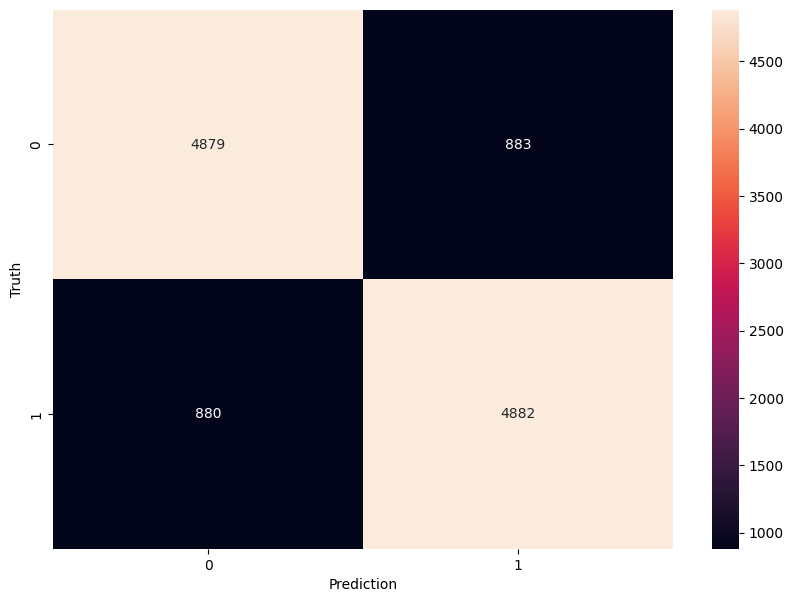

In [230]:
cm_DT = confusion_matrix(Y_train_smote, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#SVM

In [231]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assume X is a 2D numpy array of shape (n_samples, n_features) containing the feature vectors
# and y is a 1D numpy array of shape (n_samples,) containing the binary class labels

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the SVM model
clf = SVC(kernel='linear')
clf.fit(X_train_smote, Y_train_smote)

# Predict on the testing set
Y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9030948756976154


In [232]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       531
           1       0.95      0.92      0.93      1440

    accuracy                           0.90      1971
   macro avg       0.87      0.89      0.88      1971
weighted avg       0.91      0.90      0.90      1971



Text(95.72222222222221, 0.5, 'Truth')

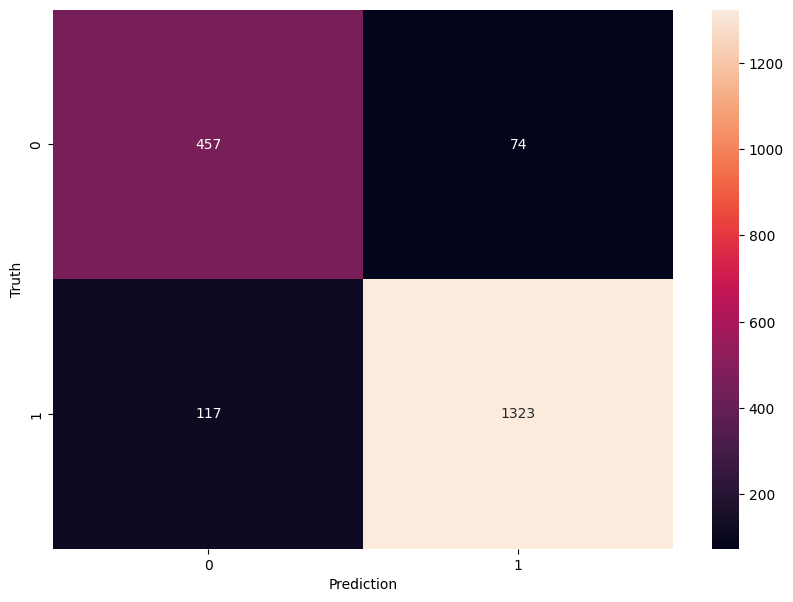

In [233]:
cm = confusion_matrix(Y_test, Y_pred)
cm

# from matplotlib import pyplot as plt
# import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [234]:
Y_pred = clf.predict(X_train_smote)

# Calculate the accuracy score
accuracy = accuracy_score(Y_train_smote, Y_pred)
print("Accuracy on training data:", accuracy)

Accuracy on training data: 0.9199930579659841


In [235]:
print(classification_report(Y_train_smote, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5762
           1       0.90      0.94      0.92      5762

    accuracy                           0.92     11524
   macro avg       0.92      0.92      0.92     11524
weighted avg       0.92      0.92      0.92     11524



Text(95.72222222222221, 0.5, 'Truth')

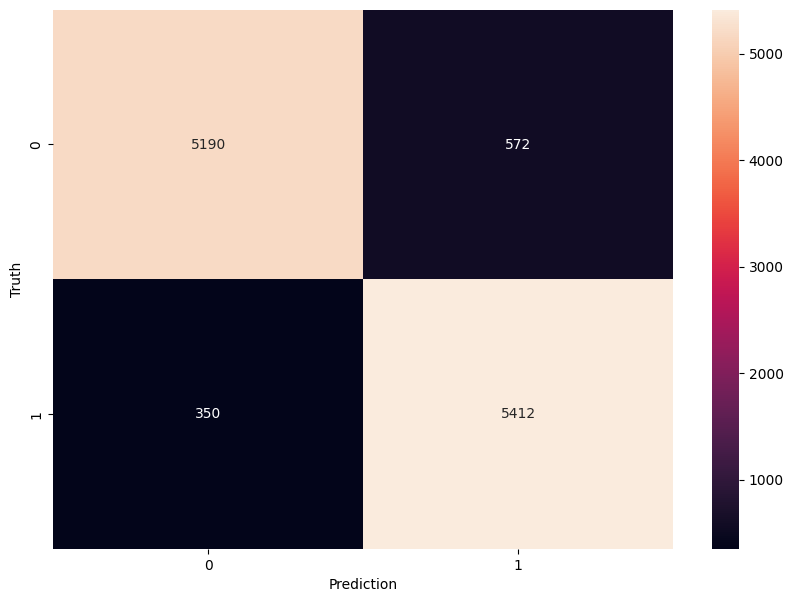

In [236]:
cm_DT = confusion_matrix(Y_train_smote, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [137]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       531
           1       0.95      0.92      0.93      1440

    accuracy                           0.90      1971
   macro avg       0.87      0.89      0.88      1971
weighted avg       0.91      0.90      0.90      1971



#Bagging

In [237]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assume X is a 2D numpy array of shape (n_samples, n_features) containing the feature vectors
# and y is a 1D numpy array of shape (n_samples,) containing the binary class labels

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a bagging classifier
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10)

# Train the bagging classifier
bagging_classifier.fit(X_train_smote, Y_train_smote)

# Predict on the testing set
Y_pred = bagging_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Bagging accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging accuracy: 0.893455098934551


In [238]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       531
           1       0.94      0.91      0.93      1440

    accuracy                           0.89      1971
   macro avg       0.86      0.88      0.87      1971
weighted avg       0.90      0.89      0.90      1971



Text(95.72222222222221, 0.5, 'Truth')

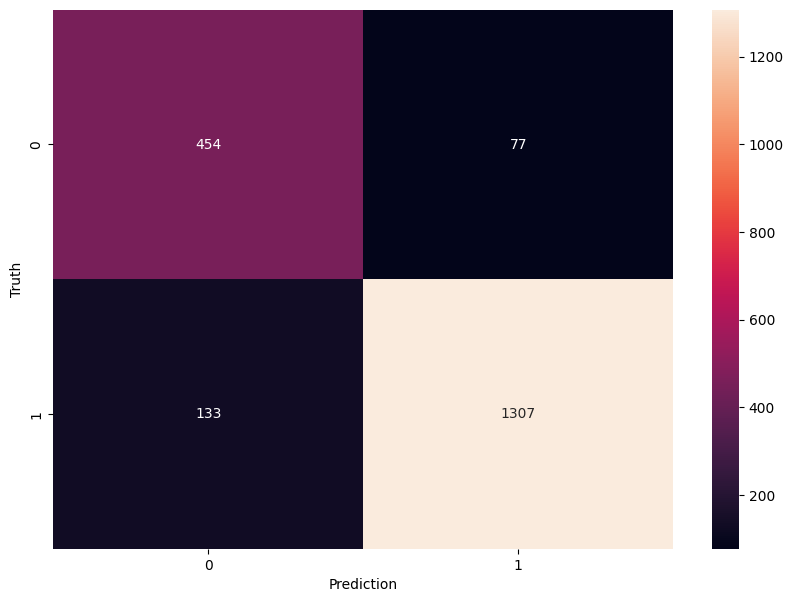

In [239]:
cm_DT = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [240]:
Y_pred = clf.predict(X_train_smote)

# Calculate the accuracy score
accuracy = accuracy_score(Y_train_smote, Y_pred)
print("Accuracy on training data:", accuracy)

Accuracy on training data: 0.9199930579659841


In [241]:
print(classification_report(Y_train_smote, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5762
           1       0.90      0.94      0.92      5762

    accuracy                           0.92     11524
   macro avg       0.92      0.92      0.92     11524
weighted avg       0.92      0.92      0.92     11524



Text(95.72222222222221, 0.5, 'Truth')

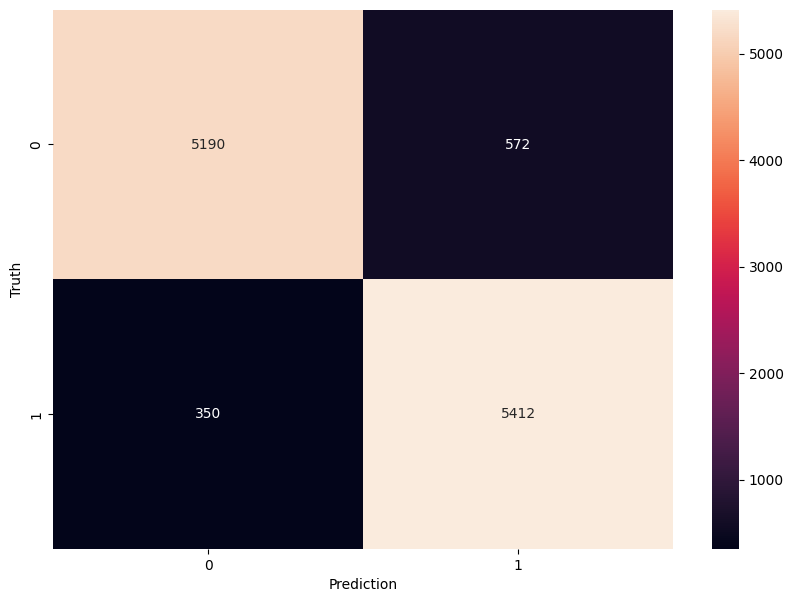

In [243]:
cm_DT = confusion_matrix(Y_train_smote, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#Boosting

In [245]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assume X is a 2D numpy array of shape (n_samples, n_features) containing the feature vectors
# and y is a 1D numpy array of shape (n_samples,) containing the binary class labels

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a boosting classifier
boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the boosting classifier
boosting_classifier.fit(X_train_smote, Y_train_smote)

# Predict on the testing set
Y_pred = boosting_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Boosting accuracy:", accuracy)


Boosting accuracy: 0.8640284119736175


In [246]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       531
           1       0.93      0.88      0.90      1440

    accuracy                           0.86      1971
   macro avg       0.82      0.85      0.83      1971
weighted avg       0.87      0.86      0.87      1971



Text(95.72222222222221, 0.5, 'Truth')

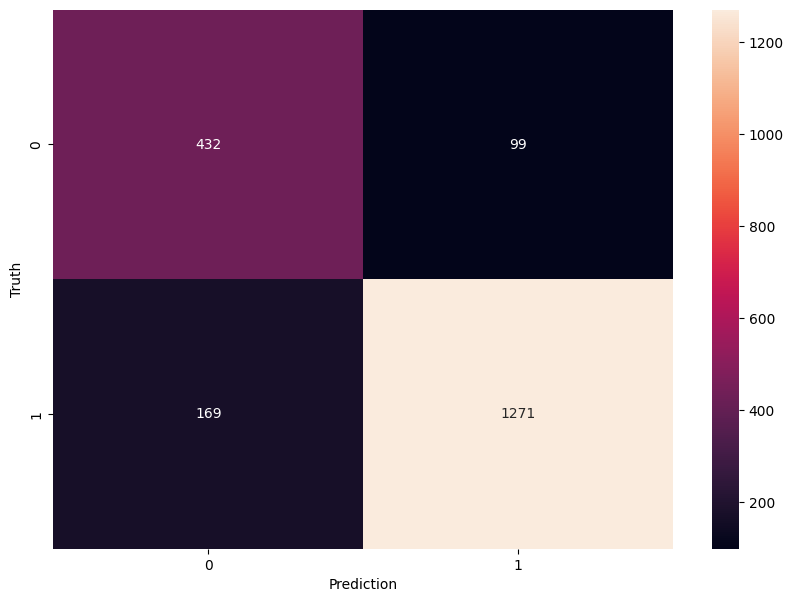

In [247]:
cm = confusion_matrix(Y_test, Y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [248]:
Y_pred = boosting_classifier.predict(X_train_smote)

# Calculate the accuracy score
accuracy = accuracy_score(Y_train_smote, Y_pred)
print("Boosting accuracy:", accuracy)

Boosting accuracy: 0.9218153418951753


In [250]:
print(classification_report(Y_train_smote, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5762
           1       0.91      0.93      0.92      5762

    accuracy                           0.92     11524
   macro avg       0.92      0.92      0.92     11524
weighted avg       0.92      0.92      0.92     11524



Text(95.72222222222221, 0.5, 'Truth')

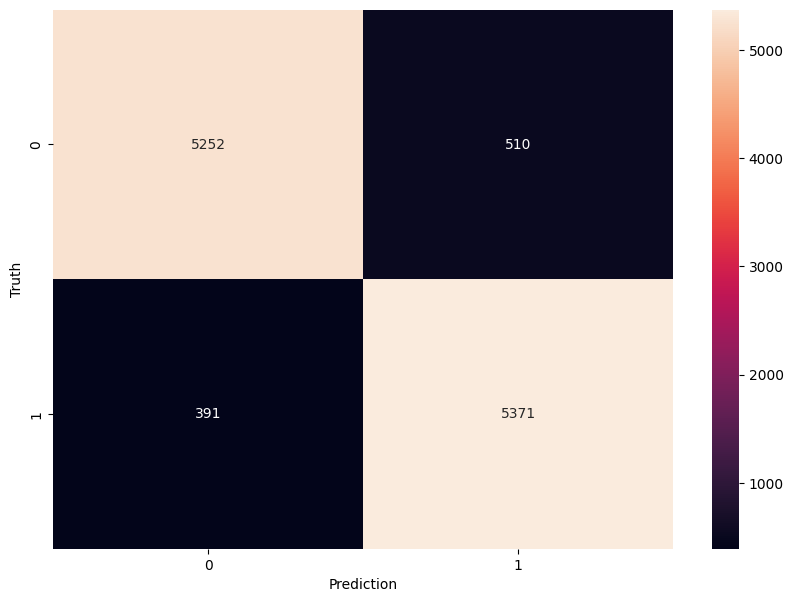

In [251]:
cm_DT = confusion_matrix(Y_train_smote, Y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm_DT, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')